In [3]:
import networkx as nx 
g=nx.planted_partition_graph(3,10,1,0)
print(len(list(g.edges)))
g=nx.complete_graph(5)
if 3!=8:
    print(1)

135
1


135.0
135 30


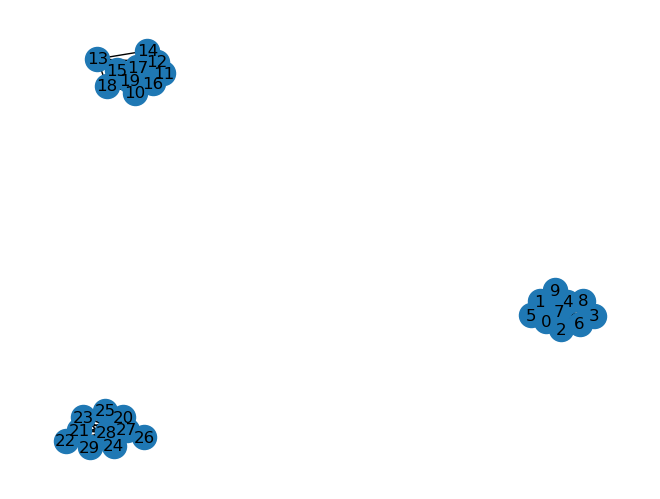

In [1]:
import synthetic 
import networkx as nx 
import random as rd
import importlib
importlib.reload(synthetic)
import synthetic as sy
k=3
l=10
p=1
print(l*(l-1)/2*k)
P=[rd.random() for i in range(int(l*(l-1)/2*k))]
rd.shuffle(P)
g=sy.evoving_g(k,l,p,P)
print(len(g.edges),len(g.nodes))
nx.draw(g,with_labels=True)
#for u, v, w in g.edges(data=True):
 #   print(u,v,w)


In [ ]:
import random
k=random.sample([1, 2, 3, 4, 5, 6], 2)
random.random()


0.5502030697583857

In [10]:
with open("datasets//evolving_k3_l10_p0.9.txt", "r") as file:
    result = [[x for x in line.split()] for line in file]
E=[]
P=[]
wei=[]
for line in result:
    node1=int(line[0])
    node2=int(line[1])
    p=float(line[2])
    wei.append((node1,node2,p))
g=nx.Graph()
g.add_weighted_edges_from(wei)


In [ ]:
def DB(m,n,P):
    import math
    lookup = []
    for i in range(m+1):
        row = []
        for j in range(n+1):
            if j > i:
                row.append(0)
            elif j == 0:
                row.append(math.prod(list(1-i for i in P[0:m])))
            else:
                row.append(lookup[i-1][j-1]*P[j-1]+lookup[i-1][j]*(1-P[j-1]))
        lookup.append(row)
    return lookup[m][n]
    

In [7]:
import numpy as np
P=[0.3 for i in range(10000)]
DB(len(P),0,P)

5e-324

In [8]:
from  DFT_cpp import dft
import random
P=[random.random() for i in range(1000)]
print(dft(5,P))
print(DB(len(P),5,P))

2.7126597116862755e-14
0.0


In [30]:
import numpy as np

def poisson_binomial_pmf(probabilities):
    """
    Calculate the PMF of a Poisson binomial distribution using FFT.
    
    :param probabilities: List of success probabilities for independent Bernoulli trials.
    :return: PMF values as a numpy array.
    """
    n = len(probabilities)  # Number of Bernoulli trials
    # Create Fourier terms for each probability
    omega = np.linspace(0, 2 * np.pi, n + 1, endpoint=False)  # Frequencies
    print(omega)
    char_func = np.ones(len(omega), dtype=complex)  # Initialize the characteristic function
    print(char_func)
    for p in probabilities:
        print('p:',p)
        
        # Characteristic function term for each probability
        char_func *= (1 - p) + p * np.exp(1j * omega)
    print(char_func)
    
    # Inverse FFT to get the PMF
    pmf = np.fft.ifft(char_func).real  # Take only the real part
    
    # Numerical stability: Clamp small negative values to zero
    #pmf = np.maximum(pmf, 0)
    return pmf

# Example usage
probabilities = [0.3, 0.5, 0.8]  # Probabilities for a Poisson binomial distribution
pmf = poisson_binomial_pmf(probabilities)

# Print results
print("PMF values:", pmf)
print("Sum of PMF (should be ~1):", np.sum(pmf))


[0.         1.57079633 3.14159265 4.71238898]
[1.+0.j 1.+0.j 1.+0.j 1.+0.j]
p: 0.3
p: 0.5
p: 0.8
[ 1.00000000e+00+0.00000000e+00j -3.60000000e-01+2.60000000e-01j
 -1.04983185e-33-1.46957616e-17j -3.60000000e-01-2.60000000e-01j]
PMF values: [0.07 0.12 0.43 0.38]
Sum of PMF (should be ~1): 1.0


In [32]:
import DFT_cpp
c=[]
for i in range(len(probabilities)+1):
    c.append(DFT_cpp.dft(i,probabilities))

In [38]:
np.fft.fft([0.07, 0.12, 0.43 ,0.38])

array([ 1.  +0.j  , -0.36+0.26j,  0.  +0.j  , -0.36-0.26j])

In [39]:
l=[0.1,0.2,0.3,0.4]
np.fft.ifft(l)

array([ 0.25+0.j  , -0.05-0.05j, -0.05+0.j  , -0.05+0.05j])

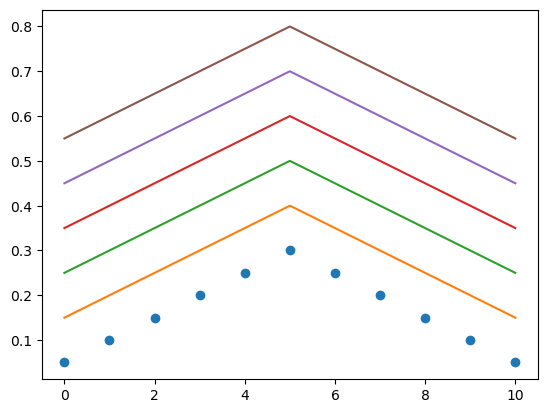

In [11]:
from numpy import random as rd
import matplotlib.pyplot as plt
m=11
x=range(m)
l=[0.05,0.1,0.15,0.2,0.25,0.3,0.25,0.2,0.15,0.1,0.05]

l1=[i+0.1 for i in l]
l2=[i+0.2 for i in l]
l3=[i+0.3 for i in l]
l4=[i+0.4 for i in l]
l5=[i+0.5 for i in l]
plt.plot(x,l,'o')
plt.plot(x,l1)
plt.plot(x,l2)
plt.plot(x,l3)
plt.plot(x,l4)
plt.plot(x,l5)


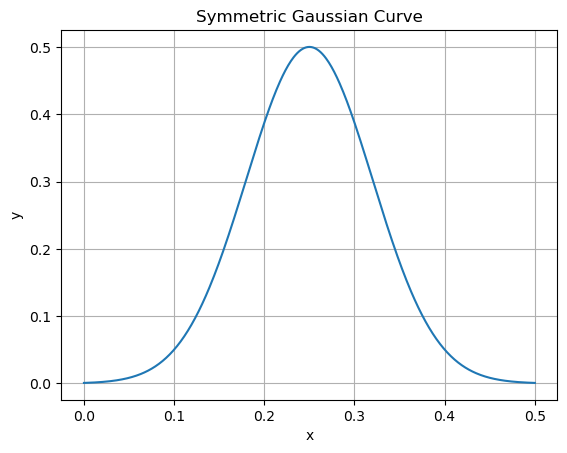

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 设置 x 范围，从 0 到 0.5
x = np.linspace(0, 0.5, 500)

# 高斯函数参数
mu = 0.25              # 均值（峰值位置，在中间）
sigma = 0.07           # 标准差，控制宽度
amplitude = 0.5        # 总高度

# 高斯函数公式
y = amplitude * np.exp(-((x - mu)**2) / (2 * sigma**2))

# 绘图
plt.plot(x, y)
plt.title("Symmetric Gaussian Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
